Name: Kagan Hamzacebi

ID: 151101064

Course: BIL470

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip

#import LogisticRegression Class from logreg.py
from logreg import LogisticRegression

## Read Dataset
* Train Dataset
* Test Dataset

In [3]:
#Functions to get Train and Test datasets
def training_images():
    with gzip.open('./dataset/train-images-idx3-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images

def test_images():
    with gzip.open('./dataset/t10k-images-idx3-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images

def training_labels():
    with gzip.open('./dataset/train-labels-idx1-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

def test_labels():
    with gzip.open('./dataset/t10k-labels-idx1-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

In [4]:
X_train, y_train, X_test, y_test = training_images(), training_labels(), test_images(), test_labels()

# EDA

## Visualized Data

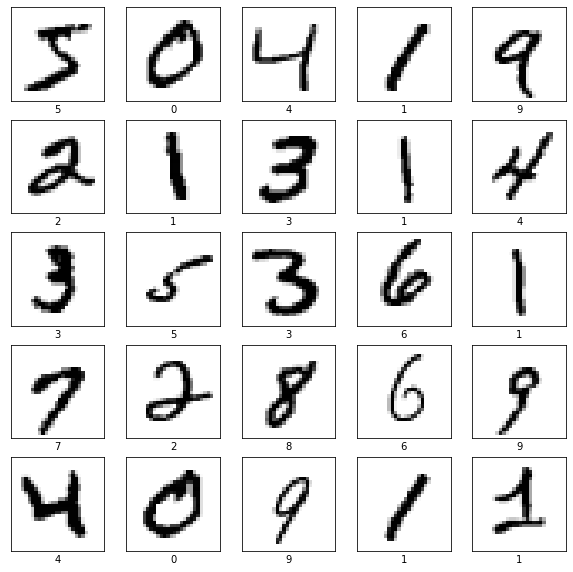

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

## Dataset Shapes

In [6]:
print('Training Sets')
print(X_train.shape)
print(y_train.shape)
print('Test Sets')
print(X_test.shape)
print(y_test.shape)

Training Sets
(60000, 28, 28)
(60000,)
Test Sets
(10000, 28, 28)
(10000,)


## Class Histogram

C:\Users\classy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

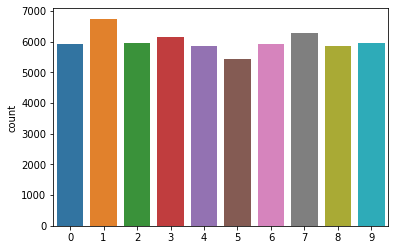

In [7]:
sns.countplot(y_train)

# Train the classifier

 * train the classifier
 * calculate metrics

## Preprocessing

In [8]:
# Normalize train and test data
X_train = X_train / 255
X_test = X_test / 255

#Get Sample and Data dimensions
n_samples_train, dim1_train, dim2_train = np.shape(X_train)
n_samples_test, dim1_test, dim2_test = np.shape(X_test)

#Flatten Data
X_train = X_train.reshape(n_samples_train, dim1_train * dim2_train)
X_test = X_test.reshape(n_samples_test, dim1_test * dim2_test)

In [9]:
#Declare clf with parameters
clf = LogisticRegression(learning_rate=0.01, epoch=100, batch_size=50)

## Train

In [10]:
#Train / Approximate Runtime for 10 epoch: 20 seconds - 100 epoch: 160 seconds
clf.fit(X_train, y_train)

## Test

In [11]:
#Test
y_pred = clf.predict(X_test)

#Process Test Labels to make them comparable
y = np.zeros((n_samples_test, 10))  # 10 is number of classes
y[np.arange(n_samples_test), y_test] = 1
y_test_ohv = y #one hot vector

# Results
* Accuracy
* Precision
* Recall
* F1 - Score
* Confusion Matrix
* ROC Curve & AUC


## Metrics

In [12]:
#Accuracy
def getAccuracy(y_test, y_pred):
    n_samples = np.shape(y_test)[0]
    positive = 0
    for i in range(n_samples):
        if np.array_equal(y_test[i], y_pred[i]):
            positive += 1
        
    return (positive / n_samples) * 100

#TP, TN, FP, FN values
def getConfMatrixData(y_test, y_pred, label_count=10):
    n_samples = np.shape(y_test)[0]
    #index 0: TP / index 1: TN / index 2: FP / index 3: FN
    data = list()
    
    for lb in range(label_count):
        #Process Test Labels to make them comparable
        y = np.zeros((1, 10))
        y[np.arange(1), lb] = 1
        lb_ohv = y[0] #one hot vector

        TP = 0
        TN = 0
        FP = 0
        FN = 0

        for i in range(n_samples):
            if np.array_equal(y_pred[i], lb_ohv) and np.array_equal(y_pred[i], y_test[i]):
                TP += 1
            if not np.array_equal(y_pred[i], lb_ohv) and not np.array_equal(y_test[i], lb_ohv):
                TN += 1
            if np.array_equal(y_pred[i], lb_ohv) and not np.array_equal(y_test[i], lb_ohv):
                FP += 1
            if not np.array_equal(y_pred[i], lb_ohv) and np.array_equal(y_test[i], lb_ohv):
                FN += 1

        data.append([TP,TN,FP,FN])
    return data
    
def metrics(y_test, y_pred):
    metrics = getConfMatrixData(y_test, y_pred)
    classCount = 10

    print('Label     Precision     Recall     F1-Score')
    print('---------------------------------------------')
    
    for i in range(classCount):
        val = metrics[i]

        precision = val[0] / (val[0] + val[2])
        recall = val[0] / (val[0] + val[3])
        f1 = 2 * ((precision * recall) / (precision + recall))

        print(str(i) + '         ' + format(precision, '.3f') + '         ' + format(recall, '.3f') + '      ' + format(f1, '.3f'))

print("Accuracy: " + str(getAccuracy(y_test_ohv, y_pred)) + '%')
print("\n")
metrics(y_test_ohv, y_pred)

Accuracy: 91.24%


Label     Precision     Recall     F1-Score
---------------------------------------------
0         0.947         0.985      0.965
1         0.937         0.989      0.962
2         0.947         0.851      0.896
3         0.838         0.929      0.881
4         0.944         0.913      0.929
5         0.847         0.885      0.866
6         0.956         0.925      0.940
7         0.957         0.886      0.920
8         0.905         0.808      0.854
9         0.859         0.943      0.899


## Confusion Matrix

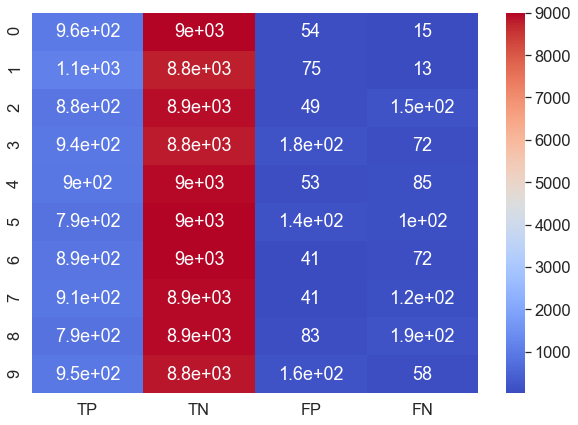

In [14]:
metrics = getConfMatrixData(y_test_ohv, y_pred)

cm = pd.DataFrame(metrics, range(10), range(4))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, xticklabels=['TP', 'TN', 'FP', 'FN'], yticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], cmap="coolwarm")

plt.show()

In [17]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_ohv, y_pred, pos_label=1)

ValueError: multilabel-indicator format is not supported

## Comments

After creating my model with 100 epoch, model getting over 91% accuracy and this percentage is totally fine. I did create Precision, Recall and F1-Score metrics class by class and checked the data. The results are looking mostly good. Values are varying between 80% - 90%.